In [1]:
# Imports
import numpy as np
import plotting_master as pm
import run

# Combs (N, warmup, time_steps, seed): 
    # N=1000, 2100, 250_000, 9090, m=0.1
    # N=1000, 2100, 250_001, 9090, m=0.1  to avoid the gauss thingy
    # N=1000, 2100, 250_000, 9090, m=1
    # (N_W): 2100, 250_000, 9090, 
    # 3100, 500, 9090 (parameters plot)
    # 4900, 300, 9090 (fig 2, wage capital density average profit...)
    # 2100, 10_000, 9090 (tau N table)

# Bankruptcy: negative_money, cannot_pay_salary
# mutation: "constant", "spread", "last_T", "minimum", "log", "mean", "worker_opinion", "0_to_mean", "normal", "positive_income"

update_methods = {"worker_update": "limited", 
                  "bankruptcy": "negative_money",
                  "mutation": "positive_income", # "positive_income"
                  "transaction_method": "wage",  # wage or salary, deterministic (all sells once)
                  "include_bankrupt_salary_in_mu": True,
                  "who_want_to_increase": "w0",  # picked, w0, all
                  }

warmup_steps = 4900
standard_parameters = {"number_of_companies": 1000, 
                       "number_of_workers": 20 * 1000,
                       "prob_exponent": 4,
                       "salary_increase": 0.1,
                       "interest_rate_free": 0.0,
                       "mutation_magnitude": 0.1,
                       "salary_min": 0.1 * 0.1,
                       "seed": 9090,
                       "update_methods": update_methods,
                       "inject_money_time": 0,#[5050, 5060, 5075],
                       "number_of_transactions_per_step": 1, 
                       "time_steps": 300 + warmup_steps,
                       }

def create_plotter_instance(kwargs):
    create_data = run.RunWorkForce(**kwargs)
    gname = create_data._get_group_name()
    plotter = pm.PlotMaster(gname, skip_values=warmup_steps)
    return create_data, plotter

a2_parameters = standard_parameters.copy()
a6_parameters = standard_parameters.copy()
a8_parameters = standard_parameters.copy()
ds005_parameters = standard_parameters.copy()
ds001_parameters = standard_parameters.copy()

a2_parameters["prob_exponent"] = 2
a6_parameters["prob_exponent"] = 6
a8_parameters["prob_exponent"] = 8
ds005_parameters["salary_increase"] = 0.05
ds001_parameters["salary_increase"] = 0.01

create_data_a2, plotter_a2 = create_plotter_instance(a2_parameters)
create_data_a4, plotter_a4 = create_plotter_instance(standard_parameters)
create_data_a6, plotter_a6 = create_plotter_instance(a6_parameters)
create_data_a8, plotter_a8 = create_plotter_instance(a8_parameters)
create_data_ds005, plotter_ds005 = create_plotter_instance(ds005_parameters)
create_data_ds001, plotter_ds001 = create_plotter_instance(ds001_parameters)

# Remove parameter text, and remove figure name from filename
for plot_instance in [plotter_a2, plotter_a4, plotter_a6, plotter_a8, plotter_ds005, plotter_ds001]:
    plot_instance.add_file_name_to_figure_name = False
    plot_instance.add_parameter_text_to_plot = False
    plot_instance.high_figure_quality = True

In [7]:
create_data_a4.store_data_in_group()     

Storing data in Steps5200_N1000_W20000_ds0.1_m0.1_rf0.0_alpha4_smin0.010000000000000002_seed9090_increasew0_transactionsfactor1_injectmoney0


100%|██████████| 5199/5199 [00:08<00:00, 622.99it/s]


In [ ]:
plotter_a4.plot_capital()
# plotter_a4.plot_salary()

In [ ]:
create_data_a2.store_data_in_group()     
create_data_a4.store_data_in_group()     
create_data_a6.store_data_in_group()     
create_data_a8.store_data_in_group()     

In [ ]:
def save_parameter_values(tau_values=None, N_values=None, alpha_values=None):
    if tau_values is None: tau_values = [1]
    if N_values is None: N_values = [1000]
    if alpha_values is None: alpha_values = [4]
    
    for tau in tau_values:
        for N in N_values:
            for alpha in alpha_values:
                parameters = standard_parameters.copy()
                parameters["number_of_transactions_per_step"] = tau
                parameters["number_of_companies"] = N
                parameters["prob_exponent"] = alpha
                data_instance = run.RunWorkForce(**parameters)
                data_instance.store_data_in_group()
            
# save_parameter_values(alpha_values=[2, 4, 8], N_values=[100, 1000, 10000])

In [ ]:
lower_pct_tau = 10
upper_pct_tau = 95
hard_lower_bound_tau = 0.04
tau_N_table = plotter_a4.format_tau_table_latex(tau_values=[1, 2, 4, 100], N_values=[100, 1000, 10_000], alpha_values=[2, 4, 8], 
                                                lower_pct=lower_pct_tau, upper_pct=upper_pct_tau, hard_lower_bound=hard_lower_bound_tau)
print(tau_N_table)

\begin{tabular}{rrrr}
\hline
   \$\textbackslash{}tau \textbackslash{}backslash N\$ &   100 &   1000 &   10000 \\
\hline
                     1 &  0.35 &   0.13 &    0.03 \\
                     2 &  0.34 &   0.21 &    0.25 \\
                     4 &  0.54 &   0.2  &    0.5  \\
                   100 &  0.73 &   0.11 &    0.59 \\
\hline
\end{tabular}


100%|██████████| 4/4 [00:50<00:00, 12.57s/it]


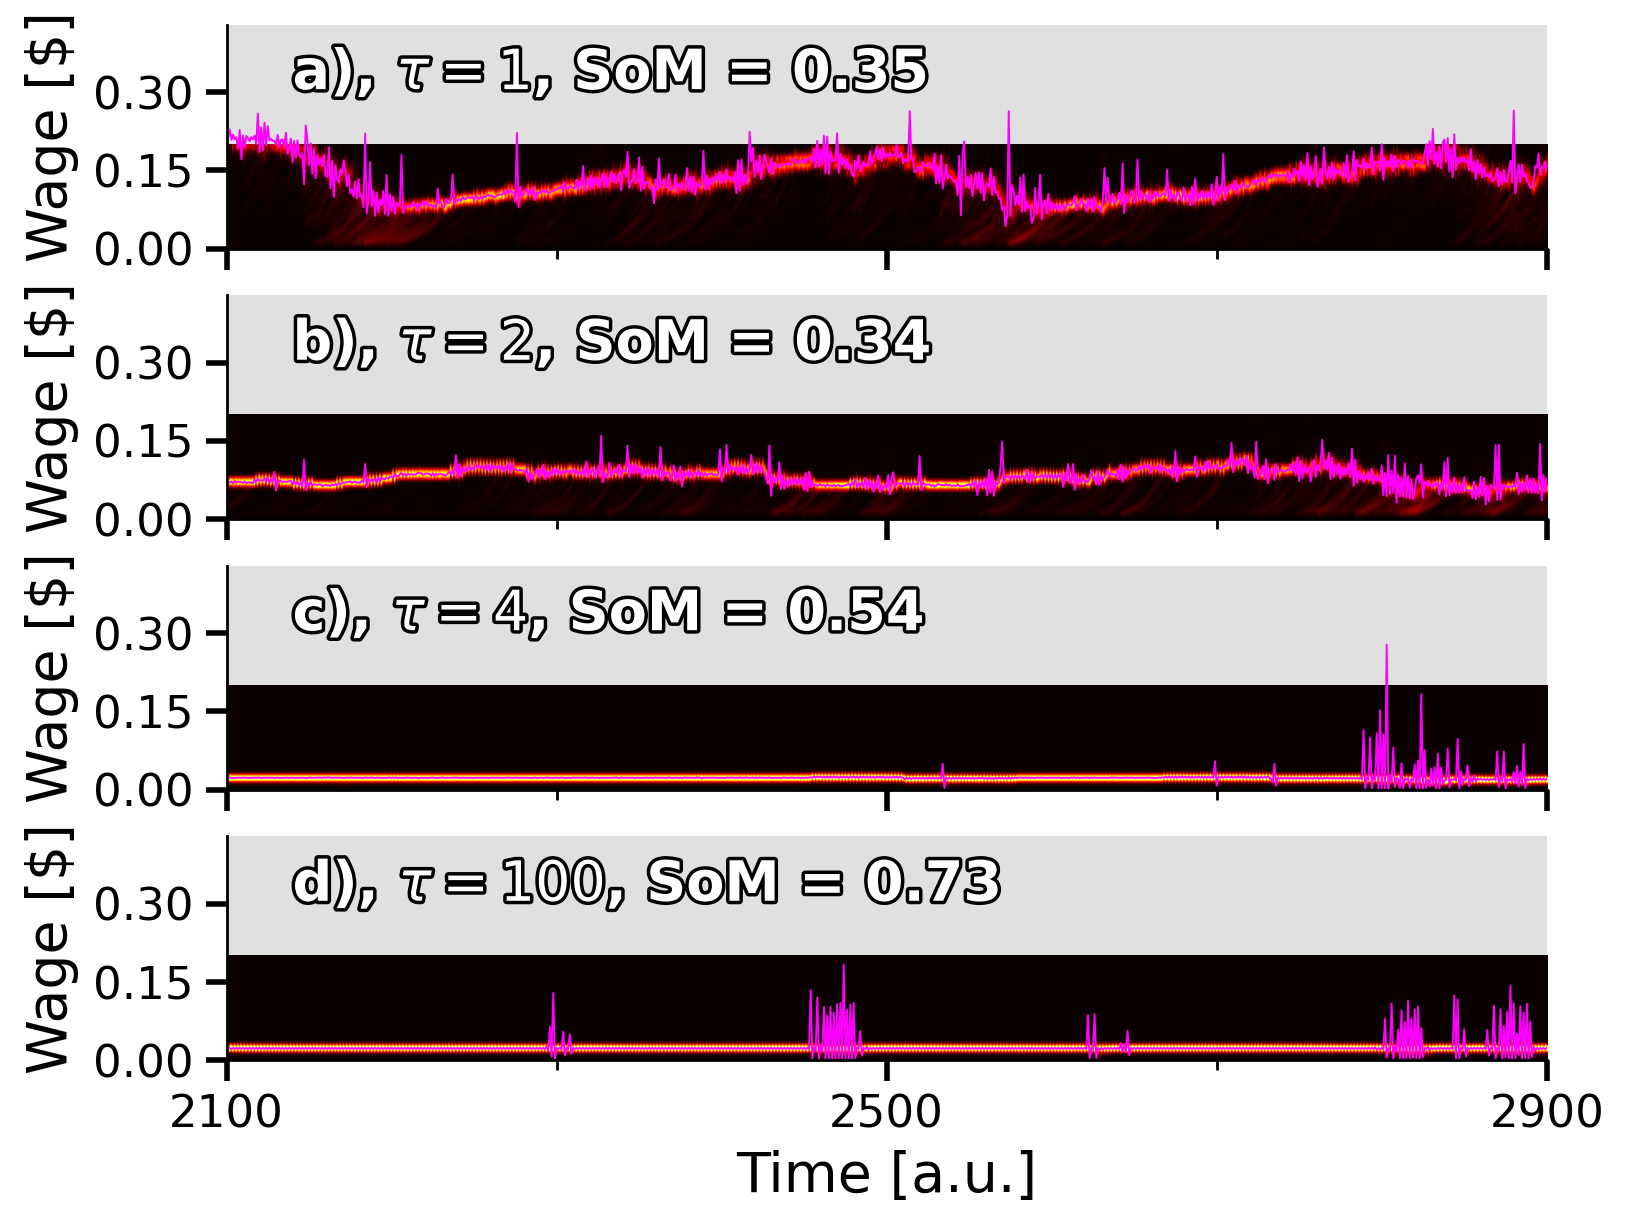

In [4]:
plotter_a4.plot_tau(time_values_to_show=800, tau_values=[1, 2, 4, 100], N=100, bandwidth=0.005, eval_points=250, kernel="gaussian", s_lim=(0, 0.2),
                    lower_pct=lower_pct_tau, upper_pct=upper_pct_tau, hard_lower_bound=hard_lower_bound_tau)

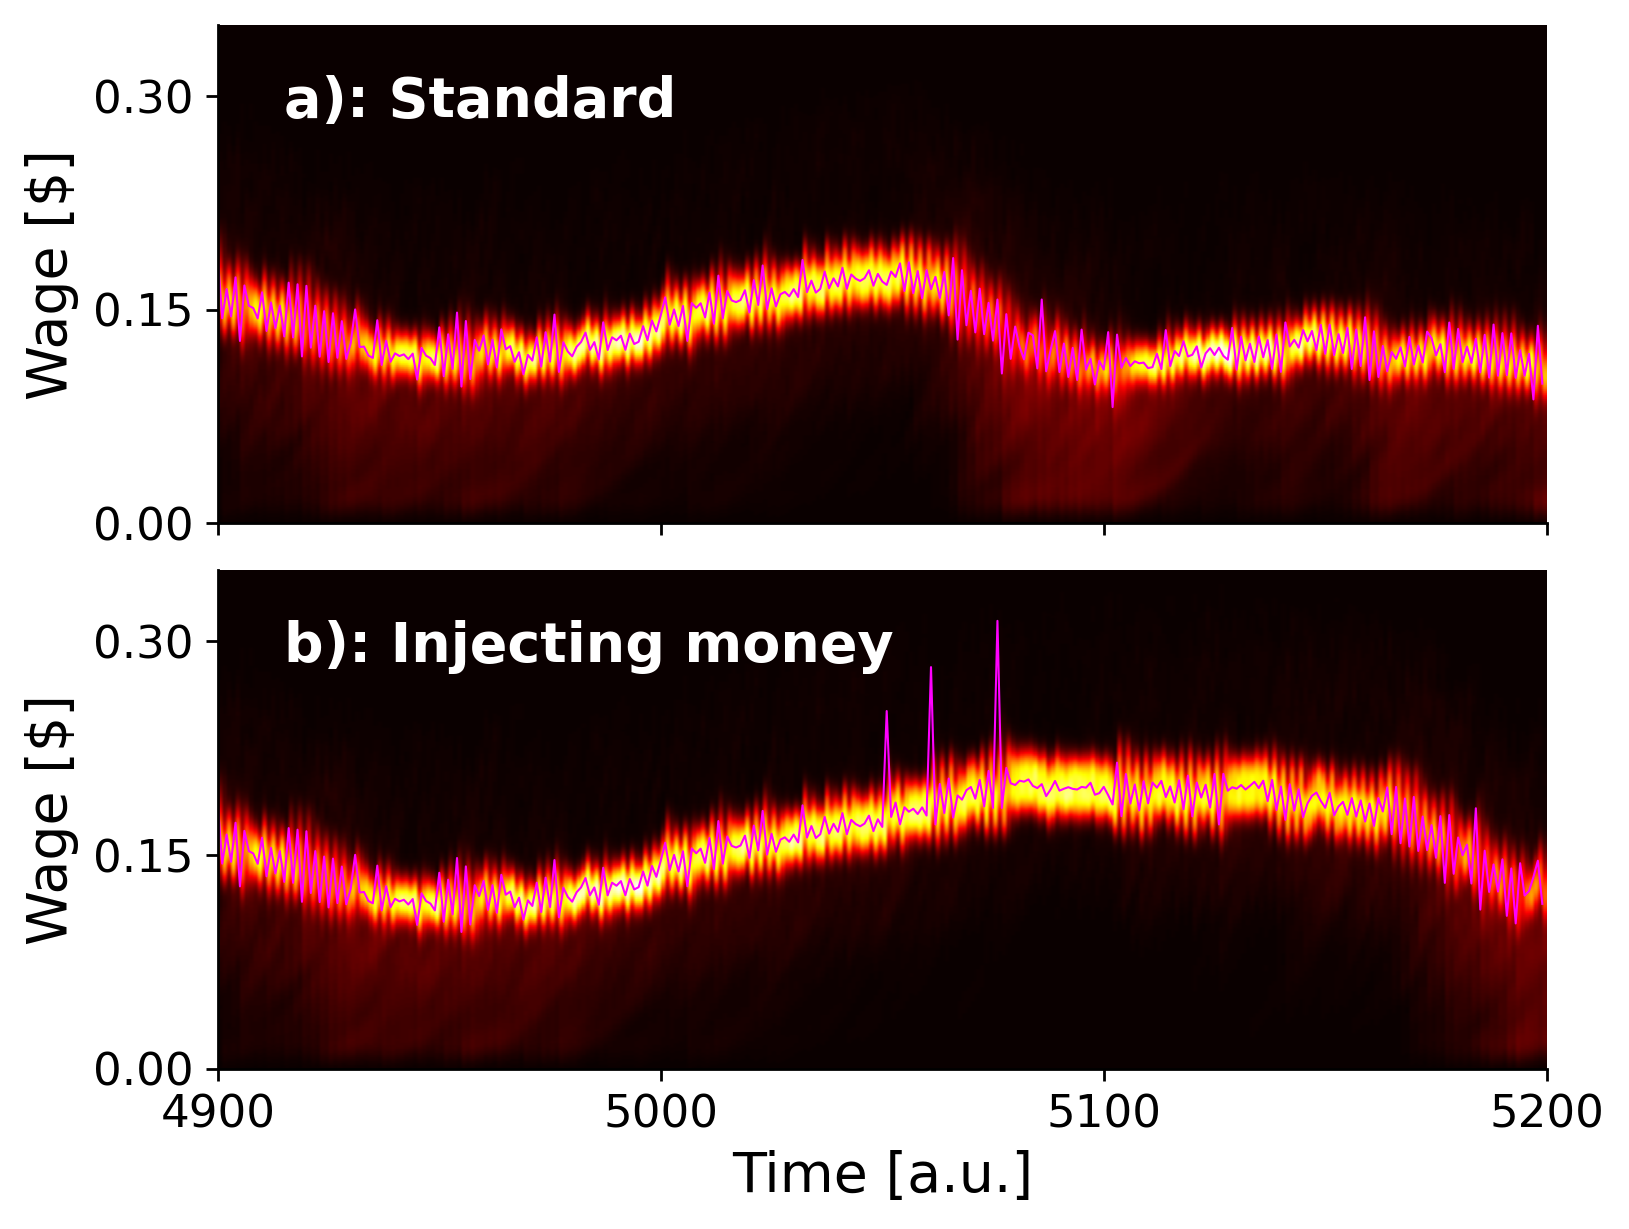

In [2]:
plotter_a4.plot_inject_money(inject_money_time=5050, bandwidth=0.007, s_lim=(0, 0.35), show_mean=True)

In [ ]:
# Baseline (m=0.1, ds/s=0.1)
recession_peak_hyperpar_a2 = {"window_size": 10, "peak_distance": 40, "peak_width":45, "peak_height":0.112, "trough_height":-0.105, 
                          "peak_prominence":0.008, "trough_prominence":0.008}
recession_peak_hyperpar_a4 = {"window_size": 10, "peak_distance": 35, "peak_width":25, "peak_height":0.14, "trough_height":-0.135, 
                          "peak_prominence":0.02, "trough_prominence":0.01}
recession_peak_hyperpar_a6 = {"window_size": 10, "peak_distance": 45, "peak_width":25, "peak_height":0.20, "trough_height":-0.185, 
                          "peak_prominence":0.025, "trough_prominence":0.025}
recession_peak_hyperpar_a8 = {"window_size": 10, "peak_distance": 40, "peak_width":25, "peak_height":0.31, "trough_height":-0.3, 
                          "peak_prominence":0.04, "trough_prominence":0.04}

# ds/s = 0.05
recession_peak_hyperpar_a2_ds005 = {"window_size": 10, "peak_distance": 250, "peak_width":250, "peak_height":0.09, "trough_height":-0.85, 
                          "peak_prominence":0.018, "trough_prominence":0.015}
recession_peak_hyperpar_a4_ds005 = {"window_size": 10, "peak_distance": 250, "peak_width":60, "peak_height":0.118, "trough_height":-0.11, 
                          "peak_prominence":0.01, "trough_prominence":0.01}
recession_peak_hyperpar_a6_ds005 = {"window_size": 10, "peak_distance": 200, "peak_width":50, "peak_height":0.15, "trough_height":-0.14, 
                          "peak_prominence":0.03, "trough_prominence":0.03}
recession_peak_hyperpar_a8_ds005 = {"window_size": 10, "peak_distance": 150, "peak_width":60, "peak_height":0.19, "trough_height":-0.155, 
                          "peak_prominence":0.04, "trough_prominence":0.03}

# m = 1
recession_peak_hyperpar_a2_m1 = {"window_size": 10, "peak_distance": 40, "peak_width":80, "peak_height":1.05, "trough_height":-1.05, 
                          "peak_prominence":0.2, "trough_prominence":0.1}
recession_peak_hyperpar_a4_m1 = {"window_size": 10, "peak_distance": 50, "peak_width":50, "peak_height":1.45, "trough_height":-1.3, 
                          "peak_prominence":0.3, "trough_prominence":0.3}
recession_peak_hyperpar_a6_m1 = {"window_size": 10, "peak_distance": 50, "peak_width":50, "peak_height":1.95, "trough_height":-1.8, 
                          "peak_prominence":0.45, "trough_prominence":0.45}
recession_peak_hyperpar_a8_m1 = {"window_size": 10, "peak_distance": 50, "peak_width":50, "peak_height":3., "trough_height":-2.75, 
                          "peak_prominence":0.45, "trough_prominence":0.25}

# m = 10
recession_peak_hyperpar_a2_m10 = {"window_size": 10, "peak_distance": 40, "peak_width":50, "peak_height":10.5, "trough_height":-10.5, 
                          "peak_prominence": 1, "trough_prominence": 1}
recession_peak_hyperpar_a4_m10 = {"window_size": 10, "peak_distance": 50, "peak_width":40, "peak_height":13.5, "trough_height":-13.5, 
                          "peak_prominence":2.5, "trough_prominence":2.5}
recession_peak_hyperpar_a6_m10 = {"window_size": 10, "peak_distance": 50, "peak_width":40, "peak_height":20, "trough_height":-18, 
                          "peak_prominence":4, "trough_prominence":4}
recession_peak_hyperpar_a8_m10 = {"window_size": 10, "peak_distance": 50, "peak_width":40, "peak_height":28., "trough_height":-26, 
                          "peak_prominence":4.5, "trough_prominence":2.5}

In [ ]:
recession_peak_hyperpar_a2_m1 = {"window_size": 10, "peak_distance": 40, "peak_width":80, "peak_height":0.105, "trough_height":-0.15, 
                          "peak_prominence":0.2, "trough_prominence":0.1}
recession_peak_hyperpar_a4_m1 = {"window_size": 10, "peak_distance": 50, "peak_width":50, "peak_height":1.45, "trough_height":-1.3, 
                          "peak_prominence":0.3, "trough_prominence":0.3}
recession_peak_hyperpar_a6_m1 = {"window_size": 10, "peak_distance": 50, "peak_width":50, "peak_height":1.95, "trough_height":-1.8, 
                          "peak_prominence":0.45, "trough_prominence":0.45}
recession_peak_hyperpar_a8_m1 = {"window_size": 10, "peak_distance": 50, "peak_width":50, "peak_height":3., "trough_height":-2.75, 
                          "peak_prominence":0.45, "trough_prominence":0.25}


# plotter_a2._detect_recession_single_loop(plot=True, **recession_peak_hyperpar_a2_ds005)
plotter_a4._detect_recession_single_loop(plot=True, **recession_peak_hyperpar_a4)
# plotter_a6._detect_recession_single_loop(plot=True, **recession_peak_hyperpar_a6_m1)
# plotter_a8._detect_recession_single_loop(plot=True, **recession_peak_hyperpar_a8_m1)


In [ ]:
# plotter_a2._save_recession_results(recession_peak_hyperpar_a2)
plotter_a4._save_recession_results(recession_peak_hyperpar_a4)
# plotter_a6._save_recession_results(recession_peak_hyperpar_a6)
# plotter_a8._save_recession_results(recession_peak_hyperpar_a8)

# plotter_a2._save_recession_results(recession_peak_hyperpar_a2_m1)
# plotter_a4._save_recession_results(recession_peak_hyperpar_a4_m1)
# plotter_a6._save_recession_results(recession_peak_hyperpar_a6_m1)
# plotter_a8._save_recession_results(recession_peak_hyperpar_a8_m1)


# plotter_a2._save_recession_results(recession_peak_hyperpar_a2_m10)
# plotter_a4._save_recession_results(recession_peak_hyperpar_a4_m10)
# plotter_a6._save_recession_results(recession_peak_hyperpar_a6_m10)
# plotter_a8._save_recession_results(recession_peak_hyperpar_a8_m10)

## Figures that go in the main text

In [ ]:
# plotter_a2.plot_economic_results(recession_parameters=recession_peak_hyperpar_a2,   # Recession time between and duration detection
#                                  Nbins_asset_return_data=600,  # S&P 500 asset return
#                                  bin_width_lifespan=1,  # Lifespan
#                                  Nbins_NBER_time=15, Nbins_NBER_duration=12,  # NBER recession data
#                                  ylim_size=(5e-9, 8e1),
#                                  )

plotter_a4.plot_economic_results(recession_parameters=recession_peak_hyperpar_a4,   # Recession time between and duration detection
                                 Nbins_asset_return_data=600,  # S&P 500 asset return
                                 bin_width_lifespan=1,  # Lifespan
                                 Nbins_NBER_time=15, Nbins_NBER_duration=12,  # NBER recession data
                                 ylim_size=(5e-9, 8e1),
                                 inflation_change_type="percent"
                                 )

# plotter_a6.plot_economic_results(recession_parameters=recession_peak_hyperpar_a6,   # Recession time between and duration detection
#                                  Nbins_asset_return_data=600,  # S&P 500 asset return
#                                  bin_width_lifespan=1,  # Lifespan
#                                  Nbins_NBER_time=15, Nbins_NBER_duration=12,  # NBER recession data
#                                  ylim_size=(5e-9, 8e1),
#                                  )

# plotter_a8.plot_economic_results(recession_parameters=recession_peak_hyperpar_a8,   # Recession time between and duration detection
#                                  Nbins_asset_return_data=600,  # S&P 500 asset return
#                                  bin_width_lifespan=1,  # Lifespan
#                                  Nbins_NBER_time=15, Nbins_NBER_duration=12,  # NBER recession data
#                                  ylim_size=(5e-9, 8e1),
#                                  inflation_change_type="percent",
#                                  )

### Density graphs

### Store values

In [ ]:
plotter_a4.plot_lifespan()

In [ ]:
lifespan = plotter_a4._get_lifespan()
half_time = np.median(lifespan)
plotter_a4.plot_lifespan(bin_width=1)

In [ ]:
# recession_peak_hyperpar_a2 = {"window_size": 10, "peak_distance": 15, "peak_width":30, "peak_height":0.106, "trough_height":-0.108, 
#                           "peak_prominence":0.005, "trough_prominence":0.005}

# plotter_a2.plot_recession(Nbins=None, Nbins_NBER=14, plot_peaks=False,
#                           **recession_peak_hyperpar_a2)

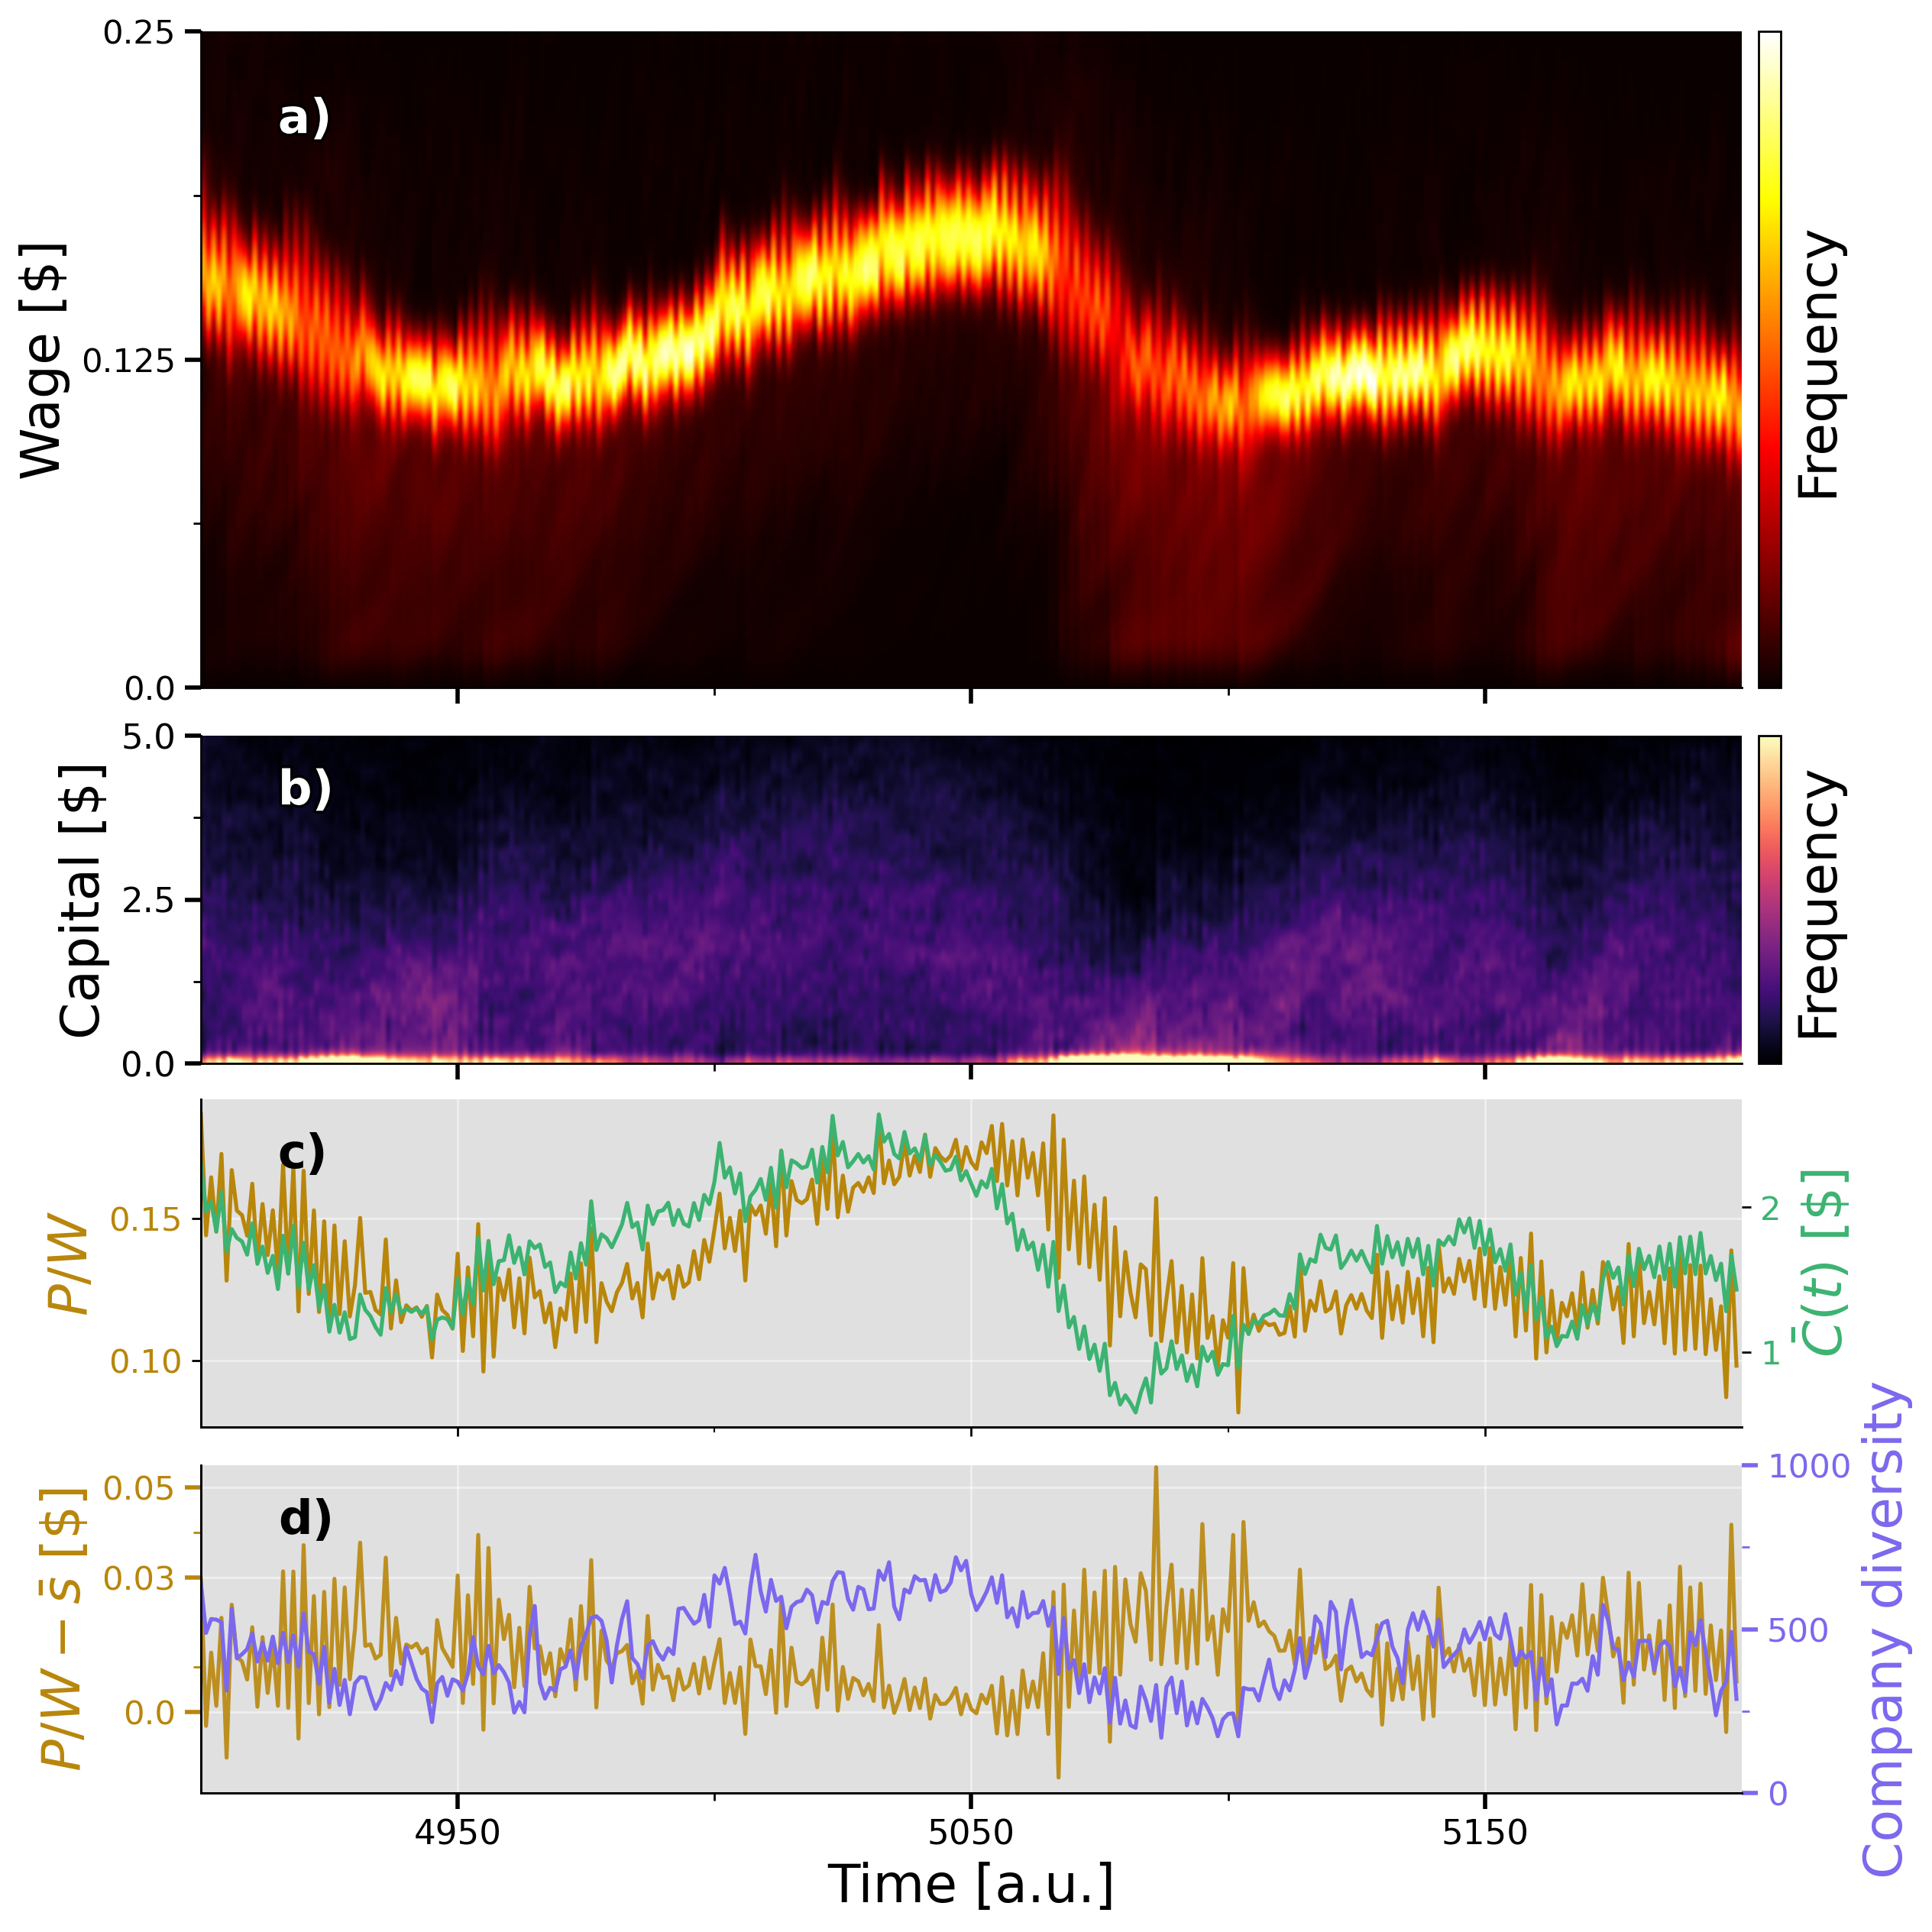

In [2]:
plotter_a4.KDE_and_diversity(bandwidth_s=0.007, s_lim=(0, 0.25), 
                          bandwidth_C=0.08, C_lim=(0., 5),
                          eval_points=300, kernel="gaussian", C_cmap="magma", percentile_cut=99.5, show_mean=False)

# plotter_a2.KDE_and_diversity(bandwidth_s=0.004, s_lim=(0.000, 0.18), bandwidth_C=0.1, C_lim=(0., 5), eval_points=400, kernel="epanechnikov", C_logscale=True, C_cmap="plasma")


# plotter_a2.plot_running_KDE(bandwidth_s=0.004, bandwidth_d=0.15, s_lim=(0.000, 0.12), d_lim=(0.001, 6), eval_points=200, kernel="epanechnikov", show_mean=True, plot_debt=False)
# normale bandwidth: 0.0005, 0.15

In [ ]:
percentile_cut = 100

plotter_a2.plot_increased_decreased(window_size=10, bandwidth_s=0.03, s_lim=(0.5, 1.4), eval_points=200, percentile_cut=percentile_cut, kernel="gaussian")
plotter_a4.plot_increased_decreased(window_size=10, bandwidth_s=0.05, s_lim=(0.5, 2), eval_points=200, percentile_cut=percentile_cut, kernel="gaussian")
plotter_a6.plot_increased_decreased(window_size=10, bandwidth_s=0.08, s_lim=(0.5, 3.2), eval_points=200, percentile_cut=percentile_cut, kernel="gaussian")
plotter_a8.plot_increased_decreased(window_size=10, bandwidth_s=0.1, s_lim=(0.5, 4.2), eval_points=200, percentile_cut=percentile_cut, kernel="gaussian")

In [ ]:
plotter_a4.single_KDE(x_data="salary", time_point=5000, eval_points=200, bandwidth=0.025, kernel="epanechnikov")

In [ ]:
# Compare picky to relaxed peak finding
hyperpar_picky = {"window_size": 10, "peak_distance": 40, "peak_width":25, "peak_height":0.143, "trough_height":-0.14, 
                          "peak_prominence":0.04, "trough_prominence":0.01,}
hyperpar_relaxed = {"window_size": 10, "peak_distance": 15, "peak_width":1, "peak_height":0.11, "trough_height":-0.14, 
                          "peak_prominence":0.01, "trough_prominence":0.01,}

plotter_a4.plot_peak_hyperparameter_comparison(hyperpar_picky, hyperpar_relaxed, bins_picky=15, bins_relaxed=int(np.sqrt(788)), time_values_to_include=4000)

### General behaviour

In [ ]:
# Spread over Mean (SoM)
SoM_a2, SoM_a2_time, SoM_data, SoM_time_data = plotter_a2.duration_spread_over_mean(recession_peak_hyperpar_a2)
SoM_a4, SoM_a4_time, _, _ = plotter_a4.duration_spread_over_mean(recession_peak_hyperpar_a4)
SoM_a6, SoM_a6_time, _, _ = plotter_a6.duration_spread_over_mean(recession_peak_hyperpar_a6)
SoM_a8, SoM_a8_time, _, _ = plotter_a8.duration_spread_over_mean(recession_peak_hyperpar_a8)

alpha_vals = [2, 4, 6, 8]
SoM_list = [SoM_a2, SoM_a4, SoM_a6, SoM_a8]
SoM_time_list = [SoM_a2_time, SoM_a4_time, SoM_a6_time, SoM_a8_time]

print("DURATION")
print(f"Spread over Mean data =\t {SoM_data:.4f}")
for i, a in enumerate(alpha_vals):
    print(f"alpha = {a}, Spread over Mean =\t {SoM_list[i]:.4f}")
print("")
print("TIME BETWEEN RECESSIONS")
print(f"Spread over Mean data =\t {SoM_time_data:.4f}")
for i, a in enumerate(alpha_vals):
    print(f"alpha = {a}, Spread over Mean =\t {SoM_time_list[i]:.4f}")
    
print("")
# Build LaTeX table
header = r"""\begin{table}[ht]
\centering
\caption{Spread over Mean (SoM) for recession duration and time between recessions.}
\begin{tabular}{lccccc}
\hline
& Data & $\alpha=2$ & $\alpha=4$ & $\alpha=6$ & $\alpha=8$ \\
\hline
"""

row_duration = "Duration & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(
    SoM_data, *SoM_list)

row_time = "Time Between & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(
    SoM_time_data, *SoM_time_list)

footer = r"""\hline
\end{tabular}
\end{table}
"""

# Print full table
print(header + row_duration + "\n" + row_time + "\n" + footer)

In [ ]:
df_a2 = plotter_a2.time_scale_of_the_system()
df_a4 = plotter_a4.time_scale_of_the_system()
df_a6 = plotter_a6.time_scale_of_the_system()
df_a8 = plotter_a8.time_scale_of_the_system()
values_latex, ratio_latex = plotter_a4.generate_timescale_latex_tables_rowwise([df_a2, df_a4, df_a6, df_a8], [2, 4, 6, 8])

print(values_latex)
print(ratio_latex)

In [ ]:
plotter_a4.plot_capital()

In [ ]:
window_size = 1
# plotter_a2.plot_salary(window_size=window_size)
plotter_a4.plot_salary(window_size=window_size)
# plotter_a6.plot_salary(window_size=window_size)
# plotter_a8.plot_salary(window_size=window_size)

In [ ]:
time_shift = 0
plotter_a2.plot_mu_bankruptcy_correlation(time_shift)
plotter_a4.plot_mu_bankruptcy_correlation(time_shift)
plotter_a6.plot_mu_bankruptcy_correlation(time_shift)
plotter_a8.plot_mu_bankruptcy_correlation(time_shift)

In [ ]:
plotter_a2.plot_capital()
plotter_a4.plot_capital()
plotter_a8.plot_capital()

In [ ]:
# plotter_a2.plot_single_companies(N_plot=1)
plotter_a4.plot_single_companies(N_plot=1)
# plotter_a8.plot_single_companies(N_plot=1)

#### Results
- Economic relevance (asset return, lifespan etc)
- Company size

In [ ]:
group_name_list_salary_min = create_data_a4.generate_smin_arr_data(smin_vals=[1e-9, 1e-2, 1e-1, 2e-1], N_repeat=1, store_data=False)
plotter_a4.plot_lifespan_multiple_smin(group_name_list_salary_min)
# plotter_a4.compare_smin_lifespan(group_name_list_salary_min)

In [ ]:
# Economic indicators


In [ ]:
xlim_worker_log = (0.9, 3e3)
ylim_worker_log = (5e-7, 50)
Nbins_log = 7000  # N=10_000, T = 5000, sqrt(len) = 7071

plotter_a4.plot_worker_distribution(ylim=ylim_worker_log, xlim=xlim_worker_log, Nbins=Nbins_log, w_lim_fit=(60, 160))

In [ ]:
xlim_worker_log = (0.9, 3e3)
ylim_worker_log = (8e-9, 50)
Nbins_log = 7000  # N=10_000, T = 5000, sqrt(len) = 7071


plotter_a2.plot_worker_distribution(ylim=ylim_worker_log, xlim=xlim_worker_log, Nbins=Nbins_log, w_lim_fit=(40, 100))
plotter_a4.plot_worker_distribution(ylim=ylim_worker_log, xlim=xlim_worker_log, Nbins=Nbins_log, w_lim_fit=(60, 160))
plotter_a6.plot_worker_distribution(ylim=ylim_worker_log, xlim=xlim_worker_log, Nbins=Nbins_log, w_lim_fit=(70, 240))
plotter_a8.plot_worker_distribution(ylim=ylim_worker_log, xlim=xlim_worker_log, Nbins=Nbins_log, w_lim_fit=(70, 250))

# plotter_a4.plot_worker_distribution(ylim=ylim_worker_log, xlim=xlim_worker_log, Nbins=Nbins_log, bars_or_points="points")

In [ ]:
# Worker KDE over time
plotter_a4.plot_worker_KDE_over_time(bandwidth=1, N_eval_points=600, kernel="gaussian", w_lim=(0, 100), percentile_cut=99)

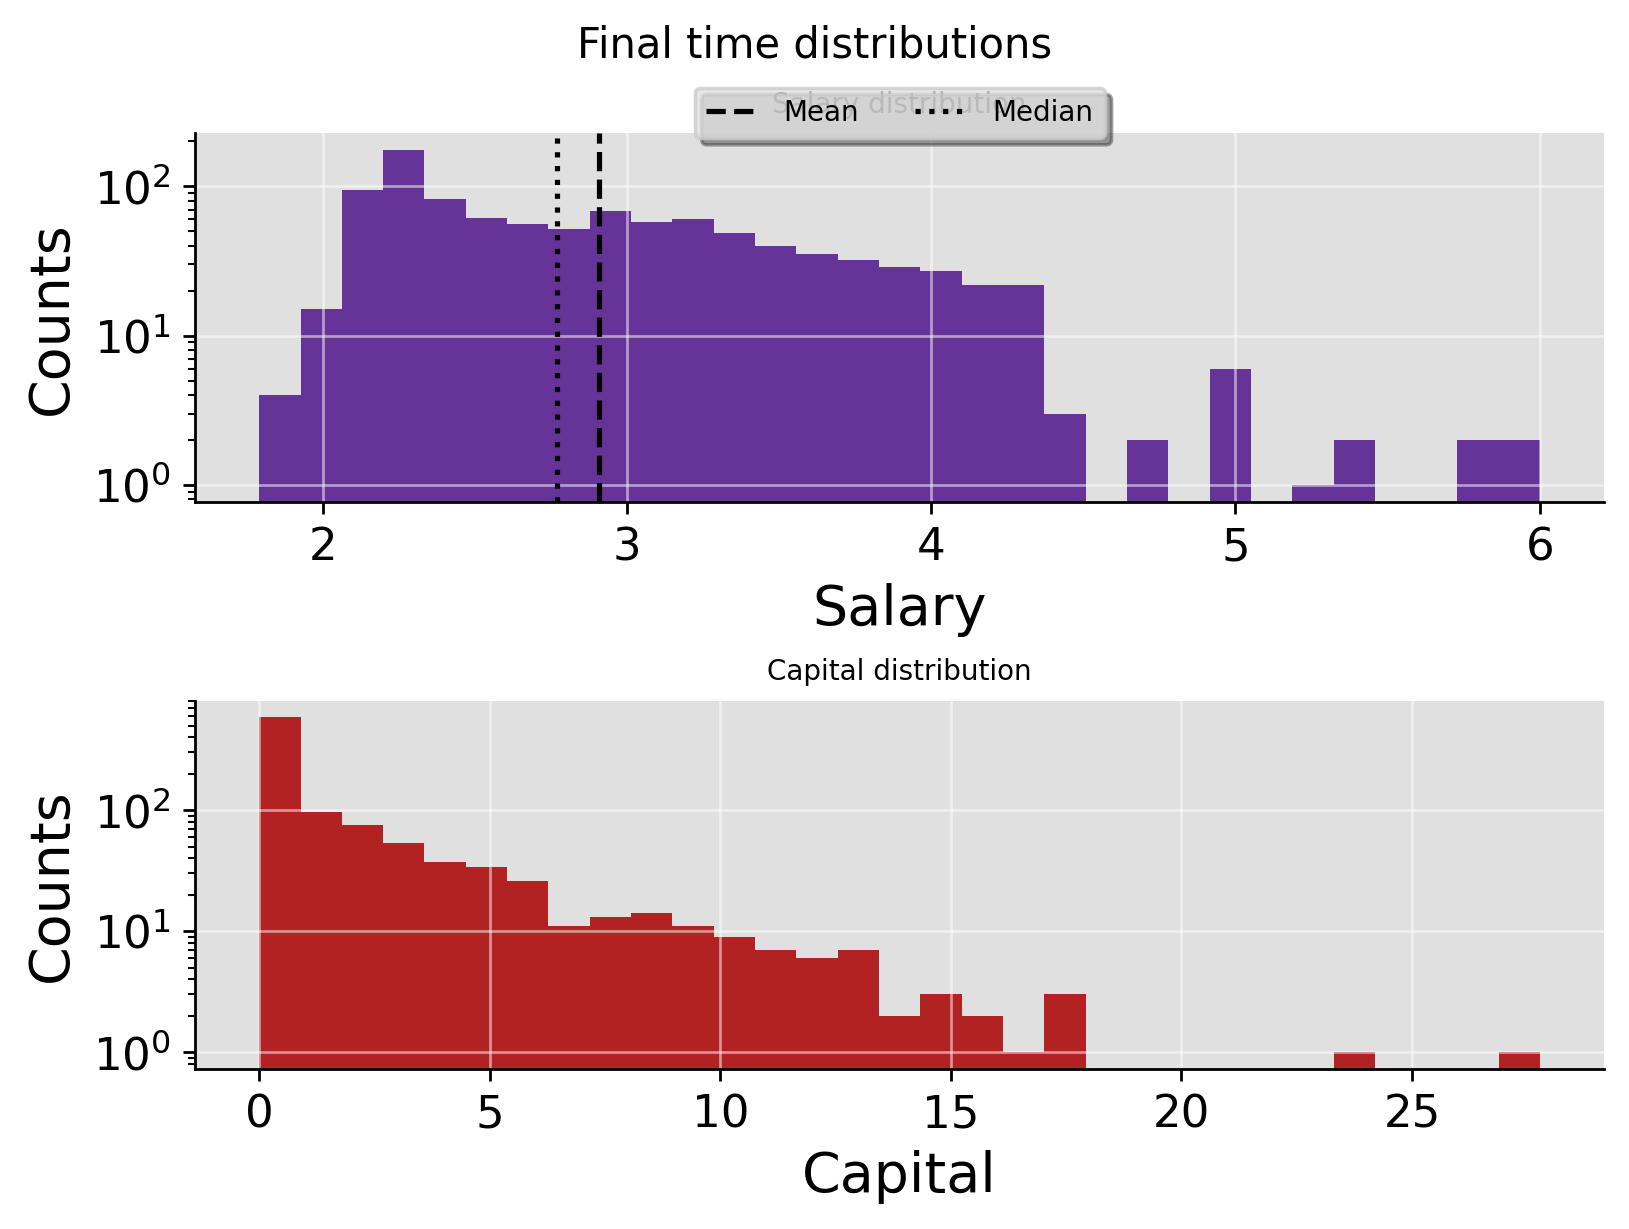

In [3]:
plotter_a4.plot_salary_and_debt_distributions()

### Stylized facts

In [ ]:
return_gname_list = create_data_a2.generate_system_data(alpha_values=[1, 4, 1, 4], N_values=[100, 100, 1000, 1000], W_factor=20, store_data=False)
plotter_a2.plot_multiple_return(group_name_list=return_gname_list, ylim=(5e-4, 3e1), same_bins=False)

In [ ]:
plotter_a2.add_file_name_to_figure_name = False
plotter_a2.add_parameter_text_to_plot = False

plotter_a2.plot_mu_return_different_time(data_name="capital_individual_mean", time_period_list=[1, 5, 25], yscale="log", gauss_std=0.5)

In [ ]:
plotter_a2.add_file_name_to_figure_name = False
plotter_a2.add_parameter_text_to_plot = False
plotter_a4.plot_autocorr(data_name="capital_individual_all", max_lag=30, time_period=1, same_subplot=True)

### Niche behaviour graphs

In [ ]:
plotter_a2.plot_mutations()

In [ ]:
plotter_a4.plot_bankrupt_new_salary()

In [ ]:
plotter_a2.animate_w0_wnon0(skip_time_steps=5);

In [ ]:
plotter_a2.plot_time_from_income_change_to_bankruptcy_distribution(show_plot=False)

In [ ]:
plotter_a2.plot_survivors(show_peak_plot=False)

### Parameter investigations

In [ ]:
# -- CDF PARAMETER --

store_data = False
# Values
mutation_magnitude = 0.1
time_steps = 250_000  # OBS 
alpha_vals = [2, 4, 8]
ds_vals = [0.025, 0.05, 0.1]
smin_vals = np.array([1e-8, 1e-1, 1, 2]) * mutation_magnitude
m_vals = [1e-5, 1e-1, 1e1, 1e5]
total_runs = len(np.concatenate((alpha_vals, ds_vals, smin_vals , m_vals)))
print("Total number of runs = ", total_runs)
print("Estimated time = ", total_runs * time_steps / 620 / 60, " minutes")  # 620 it/s, 60 s per minute.
# Labels
label_list_alpha = [fr"$\alpha=${a}" for a in alpha_vals]
label_list_ds = [fr"$\Delta s / s = {ds}$" for ds in ds_vals]
label_list_smin = [r"$s_\text{min}=$" + fr"${plotter_a4.format_scientific_latex(smin*10, precision=1, include_mantissa=False)}m$" for smin in smin_vals[:2]] + [r"$s_\text{min}=m$", r"$s_\text{min}=2m$"]
label_list_m = [fr"$m = {plotter_a4.format_scientific_latex(m, precision=1, include_mantissa=False)}$" for m in m_vals]
# Store data / Get group names
gname_list_alpha = create_data_a4.generate_alpha_arr_data(alpha_vals, N_repeat=1, store_data=store_data)
gname_list_ds = create_data_a4.generate_ds_arr_data(ds_vals, N_repeat=1, store_data=store_data)
gname_list_smin = create_data_a4.generate_smin_arr_data(smin_vals, N_repeat=1, store_data=store_data)
gname_list_m = create_data_a4.generate_m_arr_data(m_vals, N_repeat=1, store_data=store_data)
# Run the plotter
plotter_a4.plot_CDF_parameter(gname_list_alpha, gname_list_smin, gname_list_m, gname_list_ds, 
                           label_list_alpha, label_list_smin, label_list_m, label_list_ds,
                           xlim=(1, 61e3), xscale="log")

In [ ]:
# Create all datasets and store them. Does not store group names
# create_data_a2.repeated_m_runs(N_repeat=2, m_values=np.geomspace(1e-1, 1e1, 3))
create_data_a2.multiple_s_min_runs(s_min_list=np.geomspace(1e-8, 5e-2, 8))

In [ ]:
# Big data set: (check filename otherwise)
# steps: 3100, 6000
# seed: 999
# list_of_group_name_ds_arr = create_data_a2.generate_ds_tensor_data(ds_vals=np.linspace(0.005, 0.05, 9), N_repeat=10, 
#                                                     alpha_vals=[1, 2, 4], N_vals=[50, 50, 500, 500], W_vals=[50, 250, 500, 2500],
#                                                     store_data=False)

In [ ]:
group_name_ds_arr = create_data_a2.generate_ds_arr_data(ds_vals=np.linspace(0.005, 0.08, 10), N_repeat=10, store_data=False)
plotter_a2.plot_var_frequency(group_name_ds_arr, var_name="ds", data_name="salary", show_fit_results=True)

In [ ]:
# -- TIME SCALE, ALPHA, N, W --

KDE_div_gname_list = create_data_a4.generate_system_data(alpha_values=[2, 4, 2, 4], N_values=[100, 100, 1000, 1000], 
                                                      W_factor=20, store_data=True)

plotter_a4.wage_density_diversity_increase_decrease(KDE_div_gname_list, bandwidth_s=0.005, s_lim=(0.0, 0.25), eval_points=300, kernel="gaussian", window_size=5)

Lav time scale til ovenstående graf:

list_of_group_name_ds_arr = create_data_a2.generate_ds_tensor_data(ds_vals=np.linspace(0.005, 0.05, 8), N_repeat=10, 
                                                     alpha_vals=[1, 4], N_vals=[100, 1000], W_vals=[2000, 20_000],
                                                     time_steps=5000+warmup_steps, store_data=False)

In [ ]:
# -- Exponent investigation (alpha) --
group_name_list_alpha = create_data_a4.generate_alpha_arr_data(alpha_vals=[2, 4, 6, 8], N_repeat=1, store_data=True)

plotter_a4.plot_running_KDE_multiple_s_min(group_name_list_alpha, bandwidth_s=0.01, s_lim=(0, 0.35), eval_points=250, kernel="gaussian", show_mean=False,)

In [ ]:
create_data_a2.ds = 0.05
KDE_div_gname_list = create_data_a2.generate_system_data(alpha_values=[1, 4, 1, 4], N_values=[100, 100, 1000, 1000], 
                                                      W_factor=20, store_data=False)

plotter_a2.add_parameter_text_to_plot = False
plotter_a2.add_file_name_to_figure_name = False
plotter_a2.plot_power_spectrum(KDE_div_gname_list)

In [ ]:
# -- ds investigation --
# m_labels = [fr"${plotter_a4.format_scientific_latex(m, include_mantissa=False)}$" for m in m_vals]

ds_vals=[0.025, 0.05, 0.1]
ds_labels = [fr"$\Delta s / s=${ds}" for ds in ds_vals]

group_name_ds_arr = create_data_a4.generate_ds_arr_data(ds_vals=ds_vals, N_repeat=1, store_data=False)
plotter_a4.plot_lifespan_multiple_smin(group_name_ds_arr, labels=ds_labels, xlim=(0, 10_000))

In [ ]:
smin_factor = [1e-8, 1e-6, 1e-4, 1e-2, 1e-1, 1, 2]
m_vals = [mutation_magnitude] * len(smin_factor)
gname_smin_arr = create_data_a4.generate_m_arr_data(m_vals=m_vals, N_repeat=2, linear_smin=smin_factor, store_data=False)

plotter_a4.plot_smin_m_ratio(gname_smin_arr, smooth_size=10, time_points_to_show=500)

In [ ]:
# -- Mutation size investigation -- 
m_vals = [1e-5, 1e-3, 1e-1, 1e1, 1e3, 1e5]
m_labels = [fr"${plotter_a4.format_scientific_latex(m, include_mantissa=False)}$" for m in m_vals]


# group_name_list_mutation_arr = create_data_a4.generate_m_arr_data(m_vals, N_repeat=2, linear_smin=False, store_data=False)
group_name_list_mutation_arr_linear_smin = create_data_a4.generate_m_arr_data(m_vals, N_repeat=15, linear_smin=True, store_data=False)

plotter_a4.plot_min_max_vs_m(group_name_list_mutation_arr_linear_smin, data_name="mu", smooth_size=10, time_points_to_show=1000)
plotter_a4.plot_lifespan_multiple_smin(group_name_list_mutation_arr_linear_smin[:, 0], labels=m_labels, xlim=(-1, 400))

In [ ]:
group_name_ds_arr.flatten()

In [ ]:
# -- smin -- 
group_name_list_salary_min = create_data_a4.generate_smin_arr_data(smin_vals=[1e-9, 1e-2, 1e-1, 2e-1], N_repeat=1, store_data=False)


# plotter_a2.plot_multiple_s_min(group_name_list_salary_min)
plotter_a4.plot_running_KDE_multiple_s_min(group_name_list_salary_min, bandwidth_s=0.01, s_lim=(0, 0.35), eval_points=250, kernel="gaussian", show_mean=False,)

In [ ]:
# -- N and W investigation --

# Skal køres for 250_000 skridt
store_data = False
N_values = [100, 250, 1000, 2000]
ratio_values = [2, 5, 25, 50]


KDE_par = {"time_steps_to_include": 600, "bandwidth": 0.005, "data_lim": (0, 0.35), "eval_points": 250}

gname_arr = create_data_a4.generate_N_W_simple(N_values, ratio_values, store_data)
plotter_a4.plot_N_W(gname_arr, KDE_par)

In [ ]:
N_values = np.array([1000])
W_values = 1 * N_values

group_name_list_N_var_W_const, group_name_list_N_W_ratio = create_data_a4.generate_N_W_arr_data(N_values=N_values, 
                                                                                             W_values=W_values,
                                                                                             ratio_vals=[5, 20,], 
                                                                                             number_of_repeats=1, store_data=True)

# Mean plots
# plotter_a2.plot_N_var_W_const(group_name_list_N_var_W_const)
plotter_a4.plot_N_W_ratio(group_name_list_N_W_ratio, show_bankruptcy=True)

# KDE
plotter_a4.plot_running_KDE_NW(group_name_list_N_W_ratio, bandwidth=0.005, eval_points=200, lim=(0, 0.15), kernel="epanechnikov", show_mean=False)